In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, './TetrisEnv')
from TetrisBattle.envs.tetris_env import TetrisSingleEnv
from TetrisBattle import *

pygame 2.5.2 (SDL 2.28.3, Python 3.10.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
env = TetrisSingleEnv()
ob = env.reset()

 # reset the game
# action = [0,0,0,0,0,0,0,0]
# continuu = True 

# while True:
#     try:
#         action = int(input("> "))
#     except:
#         break
#     # action[move] = 1
#     ob, reward, done, info = env.step(action) # conduct the action and update game
#     print(ob, reward, done, info)
#     env.render()
    # action[move] = 0

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


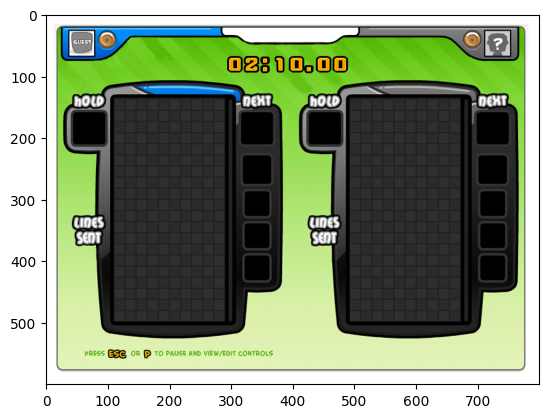

In [6]:
plt.imshow(ob, cmap="plasma")

In [7]:
ob.shape

(600, 800, 3)

In [19]:
env = TetrisSingleEnv()
ob = env.reset()
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order="last")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/Users/cameronfiske/Desktop/capstone/v_venv_3.10/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserW

In [20]:
ob, reward, done, info = env.step([0]) # conduct the action and update game
ob.shape

(1, 600, 800, 4)

In [10]:
import os 
from stable_baselines3 import PPO 
from stable_baselines3.common.callbacks import BaseCallback

In [11]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [12]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [13]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)


In [21]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=2048) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [22]:
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_1


In [ ]:
model.save('thisisatestmodel')